In [35]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('../data/dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing the necessary libraries and functions.

In [36]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [37]:
df = pd.read_csv("../data/dataset.csv")

In [38]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


## Describe the dataset

In [39]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


## For checking the no of non-null values ,memory and datatype.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


## Check for the null values in the dataset for the where if is less in range just drop it or else make fill with that values with some constrains .

In [41]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [42]:
df = df.drop('StudentID',axis=1)

In [43]:
df.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85


## Encode the values in the numeric format for the Gender Column .

In [44]:
lab_enc = LabelEncoder()
df['Gender'] = lab_enc.fit_transform(df['Gender'])

## Get the dummies values for the ParentalSupport columns .

In [45]:
df = pd.get_dummies(df,columns=['ParentalSupport'],drop_first=False)

In [46]:
df.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,John,1,85,15,78,1,80,True,False,False
1,Sarah,0,90,20,85,2,87,False,False,True
2,Alex,1,78,10,65,0,68,False,True,False
3,Michael,1,92,25,90,3,92,True,False,False
4,Emma,0,88,18,82,2,85,False,False,True


## Plot for the categorical values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


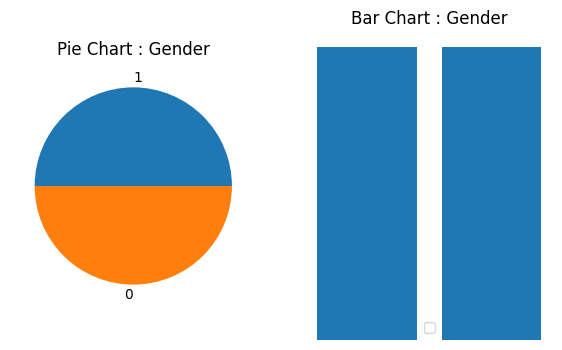

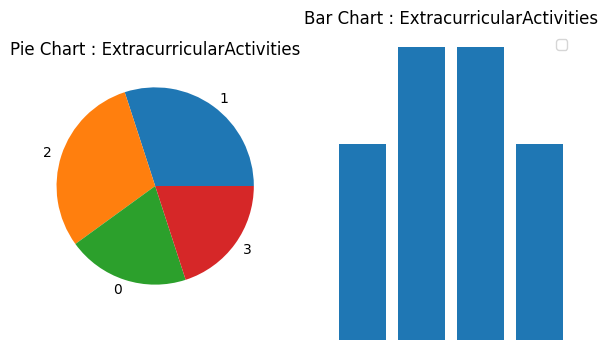

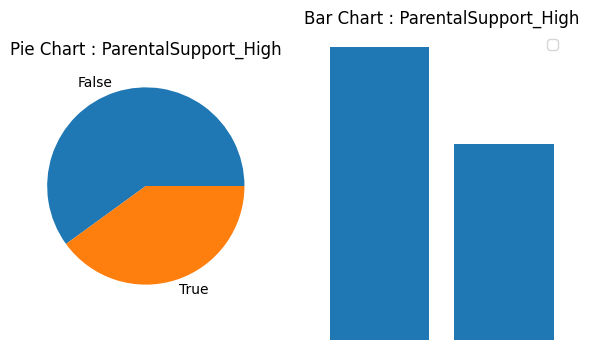

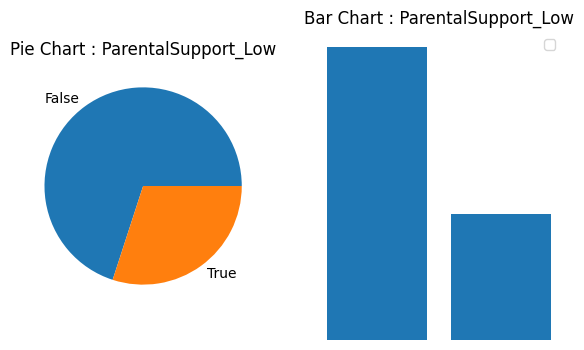

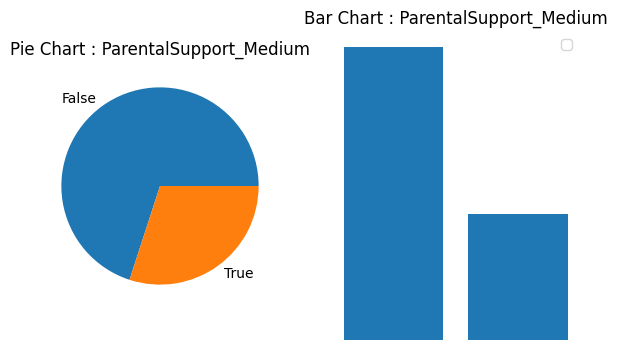

In [47]:
values = ['Gender','ExtracurricularActivities','ParentalSupport_High','ParentalSupport_Low','ParentalSupport_Medium']
for i in values:
    val = df[i].value_counts()
    idx = val.index
    vals = val.values
    fig,ax = plt.subplots(1,2,figsize=(7,4))
    ax[0].pie(vals,labels=idx)
    ax[1].bar(idx,vals)
    ax[0].set_title(f"Pie Chart : {i}")
    ax[1].set_title(f"Bar Chart : {i}")
    ax[1].axis('off')
    plt.legend()

## Plot for the Continuous Values 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


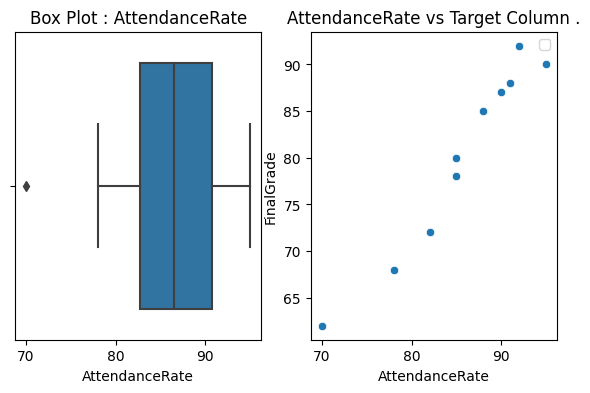

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


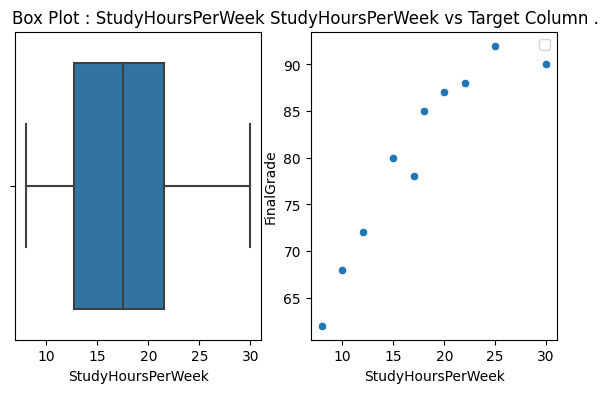

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


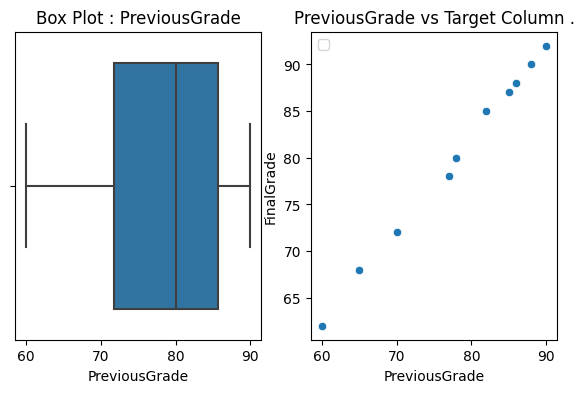

In [48]:
cols = ['AttendanceRate','StudyHoursPerWeek','PreviousGrade','FinalGrade']
for i in cols[:-1]:
    vals = df[i]
    fig,ax = plt.subplots(1,2,figsize=(7,4))
    sns.boxplot(data = df,x=i,ax=ax[0])
    ax[0].set_title(f"Box Plot : {i}")
    sns.scatterplot(data=df,x=i,y='FinalGrade',ax=ax[1])
    ax[1].set_title(f"{i} vs Target Column .")
    plt.legend()
    plt.show()

In [49]:
df.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,John,1,85,15,78,1,80,True,False,False
1,Sarah,0,90,20,85,2,87,False,False,True
2,Alex,1,78,10,65,0,68,False,True,False
3,Michael,1,92,25,90,3,92,True,False,False
4,Emma,0,88,18,82,2,85,False,False,True


## Split the dataset into the Features and Labels

In [50]:
df = df.drop('Name',axis=1)

In [51]:
X = df[['Gender','AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities','ParentalSupport_High','ParentalSupport_Low','ParentalSupport_Medium']]
y = df.FinalGrade

## Split it into the training and testing purpose

In [52]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y,test_size=0.2,random_state=42)

## Define the Linear Regression Model and find its score 

In [53]:
model1 = LinearRegression()
model1.fit(x_tr,y_tr)

LinearRegression()

In [54]:
pred = model1.predict(x_te)

In [76]:
print(pred)

[74.39 85.8 ]


## Find the metrics for the predicted value

In [78]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2 Score: ",r2_score(y_te,pred))
print("Mean Squared Error: ",mean_squared_error(y_te,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_te,pred))

R2 Score:  0.9364257777777777
Mean Squared Error:  3.576050000000005
Mean Absolute Error:  1.7950000000000017


## Define the Random Forest Regressor Model and find its metrics

In [79]:
model2 = RandomForestRegressor(random_state=42)
model2.fit(x_tr,y_tr)

RandomForestRegressor(random_state=42)

In [80]:
pred = model2.predict(x_te)

In [81]:
print("R2 Score: ",r2_score(y_te,pred))
print("Mean Squared Error: ",mean_squared_error(y_te,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_te,pred))

R2 Score:  0.9364257777777777
Mean Squared Error:  3.576050000000005
Mean Absolute Error:  1.7950000000000017


## Neighbors Regressor


In [82]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 is for Manhattan distance, p=2 is for Euclidean distance
}

In [90]:
model3 = KNeighborsRegressor()
model3.fit(x_tr, y_tr)

KNeighborsRegressor()

In [91]:
pred = model3.predict(x_te)

In [87]:
print("R2 Score: ",r2_score(y_te,pred))
print("Mean Squared Error: ",mean_squared_error(y_te,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_te,pred))

R2 Score:  0.9364257777777777
Mean Squared Error:  3.576050000000005
Mean Absolute Error:  1.7950000000000017


## From the above case model1 performs well than the model2